In [8]:
# Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Set Seaborn theme for professional look
sns.set_theme(style="whitegrid", palette="muted")

In [10]:
# Set stock symbol and date range
stock_symbol = 'TSLA'
start_date = '2021-01-01'
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

In [11]:
# Download Tesla stock data
data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [12]:
# Preprocess: Flatten 'Close' and calculate moving averages
data['Close'] = pd.Series(data['Close'].values.flatten(), index=data.index)
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()

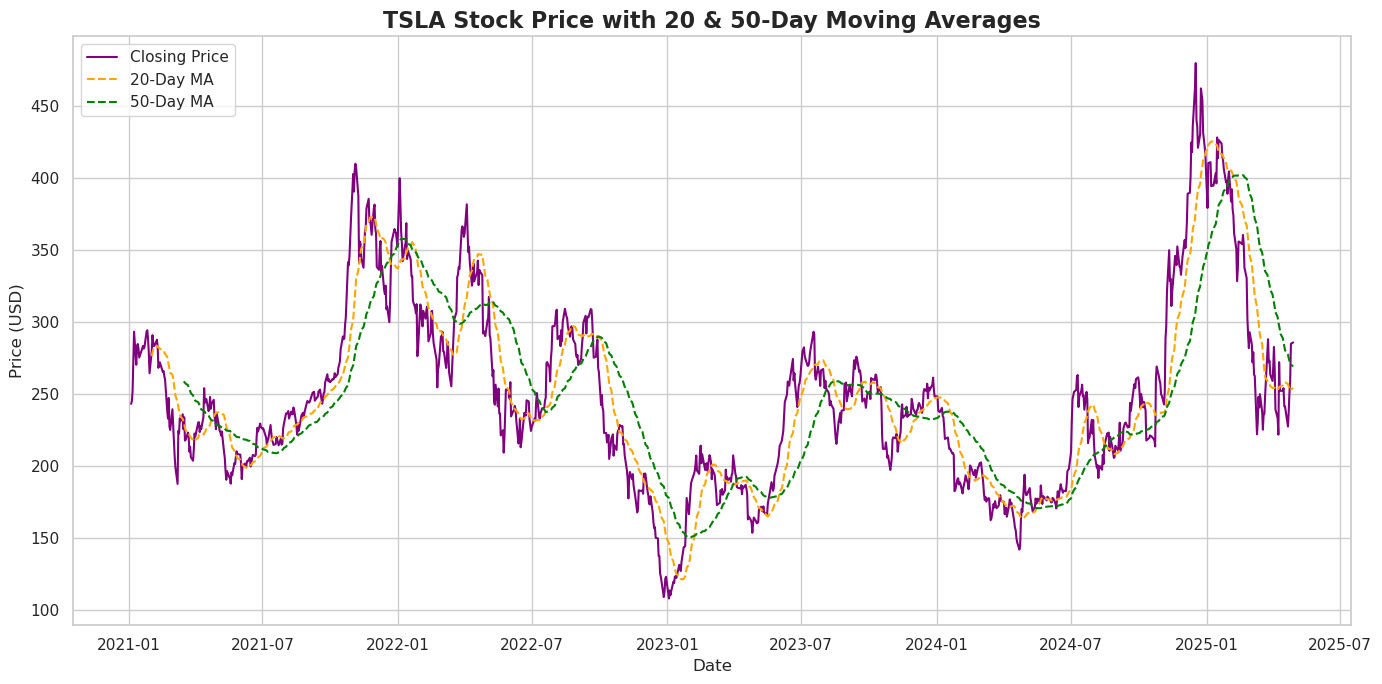

In [16]:
# Plot
plt.figure(figsize=(14,7))

# Convert any 2D arrays to 1D by flattening them
# Use .values.flatten() or .squeeze() to ensure 1D arrays
sns.lineplot(x=data.index, y=data['Close'].values.flatten(), label='Closing Price', color='purple')
sns.lineplot(x=data.index, y=data['MA20'].values.flatten(), label='20-Day MA', color='orange', linestyle='--')
sns.lineplot(x=data.index, y=data['MA50'].values.flatten(), label='50-Day MA', color='green', linestyle='--')

plt.title(f"{stock_symbol} Stock Price with 20 & 50-Day Moving Averages", fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
sns.set_theme(style="whitegrid", palette="muted")

# Save the plot
plt.savefig('visuals/tsla_moving_averages_plot.png')

plt.show()